In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1097 (4.29 KB)
Trainable params: 1097 (4.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/32 [..............................] - ETA: 23s - loss: 1.6031 - accuracy: 0.2344
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 1s 7ms/step - loss: 1.5800 - accuracy: 0.2542 - val_loss: 1.5543 - val_accuracy: 0.2913
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.5625 - accuracy: 0.3047
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.5303 - accuracy: 0.3025 - val_loss: 1.5034 - val_accuracy: 0.2635
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.4871 - accuracy: 0.3438
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.4812 - accuracy: 0.3201 - val_loss: 1.4560 - val_accuracy: 0.5158
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - 

D:\anaconda\envs\cv311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.4377 - accuracy: 0.3874 - val_loss: 1.4108 - val_accuracy: 0.4865
Epoch 5/1000
 1/32 [..............................] - ETA: 0s - loss: 1.4317 - accuracy: 0.3984
Epoch 5: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.3981 - accuracy: 0.4202 - val_loss: 1.3675 - val_accuracy: 0.4685
Epoch 6/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3681 - accuracy: 0.4922
Epoch 6: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.3662 - accuracy: 0.4443 - val_loss: 1.3217 - val_accuracy: 0.4940
Epoch 7/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3713 - accuracy: 0.4766
Epoch 7: saving model to model/point_history_classifier\point_hist

32/32 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.7005 - val_loss: 0.5844 - val_accuracy: 0.8731
Epoch 31/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7399 - accuracy: 0.6953
Epoch 31: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7711 - accuracy: 0.7020 - val_loss: 0.5707 - val_accuracy: 0.8836
Epoch 32/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7444 - accuracy: 0.6797
Epoch 32: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7677 - accuracy: 0.7072 - val_loss: 0.5597 - val_accuracy: 0.8866
Epoch 33/1000
 1/32 [..............................] - ETA: 0s - loss: 0.8064 - accuracy: 0.7188
Epoch 33: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 

Epoch 57/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7509 - accuracy: 0.7500
Epoch 57: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.7804 - val_loss: 0.3830 - val_accuracy: 0.9219
Epoch 58/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5459 - accuracy: 0.8359
Epoch 58: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.7776 - val_loss: 0.3785 - val_accuracy: 0.9249
Epoch 59/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7118 - accuracy: 0.7422
Epoch 59: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7749 - val_loss: 0.3764 - val_accuracy: 0.9219
Epoch 60/1000
 1/32 [..............................] - ETA: 0

 1/32 [..............................] - ETA: 0s - loss: 0.5260 - accuracy: 0.8047
Epoch 83: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7996 - val_loss: 0.3115 - val_accuracy: 0.9339
Epoch 84/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5970 - accuracy: 0.7891
Epoch 84: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.8034 - val_loss: 0.3100 - val_accuracy: 0.9369
Epoch 85/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4306 - accuracy: 0.8750
Epoch 85: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.8059 - val_loss: 0.3056 - val_accuracy: 0.9347
Epoch 86/1000
 1/32 [..............................] - ETA: 0s - loss: 0.45

 1/32 [..............................] - ETA: 0s - loss: 0.6421 - accuracy: 0.8047
Epoch 109: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.8279 - val_loss: 0.2734 - val_accuracy: 0.9407
Epoch 110/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4998 - accuracy: 0.7734
Epoch 110: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8177 - val_loss: 0.2726 - val_accuracy: 0.9429
Epoch 111/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5230 - accuracy: 0.8281
Epoch 111: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.8244 - val_loss: 0.2756 - val_accuracy: 0.9399
Epoch 112/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4644 - accuracy: 0.8359
Epoch 135: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8302 - val_loss: 0.2542 - val_accuracy: 0.9422
Epoch 136/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4742 - accuracy: 0.8125
Epoch 136: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.8370 - val_loss: 0.2517 - val_accuracy: 0.9407
Epoch 137/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5706 - accuracy: 0.8203
Epoch 137: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.8327 - val_loss: 0.2519 - val_accuracy: 0.9452
Epoch 138/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4573 - accuracy: 0.8281
Epoch 161: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8437 - val_loss: 0.2388 - val_accuracy: 0.9444
Epoch 162/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5003 - accuracy: 0.7891
Epoch 162: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8425 - val_loss: 0.2356 - val_accuracy: 0.9459
Epoch 163/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8594
Epoch 163: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8355 - val_loss: 0.2353 - val_accuracy: 0.9467
Epoch 164/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8828
Epoch 187: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8522 - val_loss: 0.2266 - val_accuracy: 0.9452
Epoch 188/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4146 - accuracy: 0.8750
Epoch 188: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8432 - val_loss: 0.2267 - val_accuracy: 0.9482
Epoch 189/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4191 - accuracy: 0.8281
Epoch 189: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8402 - val_loss: 0.2271 - val_accuracy: 0.9459
Epoch 190/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3702 - accuracy: 0.8516
Epoch 213: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8440 - val_loss: 0.2148 - val_accuracy: 0.9474
Epoch 214/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4361 - accuracy: 0.7969
Epoch 214: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8432 - val_loss: 0.2156 - val_accuracy: 0.9459
Epoch 215/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8828
Epoch 215: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.8485 - val_loss: 0.2151 - val_accuracy: 0.9482
Epoch 216/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4226 - accuracy: 0.8516
Epoch 239: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8573 - val_loss: 0.2099 - val_accuracy: 0.9520
Epoch 240/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5990 - accuracy: 0.8203
Epoch 240: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8507 - val_loss: 0.2124 - val_accuracy: 0.9497
Epoch 241/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5564 - accuracy: 0.8359
Epoch 241: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8495 - val_loss: 0.2113 - val_accuracy: 0.9520
Epoch 242/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4029 - accuracy: 0.8672
Epoch 265: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8562 - val_loss: 0.2073 - val_accuracy: 0.9550
Epoch 266/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4155 - accuracy: 0.8750
Epoch 266: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8537 - val_loss: 0.2101 - val_accuracy: 0.9505
Epoch 267/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3548 - accuracy: 0.8750
Epoch 267: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8477 - val_loss: 0.2055 - val_accuracy: 0.9520
Epoch 268/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8438
Epoch 291: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8600 - val_loss: 0.2010 - val_accuracy: 0.9527
Epoch 292/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4389 - accuracy: 0.8203
Epoch 292: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8455 - val_loss: 0.2019 - val_accuracy: 0.9535
Epoch 293/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8359
Epoch 293: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8560 - val_loss: 0.2003 - val_accuracy: 0.9535
Epoch 294/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8828
Epoch 317: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8462 - val_loss: 0.1994 - val_accuracy: 0.9535
Epoch 318/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4349 - accuracy: 0.8672
Epoch 318: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8547 - val_loss: 0.1989 - val_accuracy: 0.9527
Epoch 319/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8828
Epoch 319: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8550 - val_loss: 0.1969 - val_accuracy: 0.9512
Epoch 320/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3467 - accuracy: 0.9062
Epoch 343: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8640 - val_loss: 0.1946 - val_accuracy: 0.9542
Epoch 344/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8672
Epoch 344: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8583 - val_loss: 0.1924 - val_accuracy: 0.9550
Epoch 345/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3955 - accuracy: 0.9062
Epoch 345: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8608 - val_loss: 0.1950 - val_accuracy: 0.9542
Epoch 346/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4079 - accuracy: 0.8750
Epoch 369: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8648 - val_loss: 0.1918 - val_accuracy: 0.9550
Epoch 370/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4218 - accuracy: 0.8359
Epoch 370: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8658 - val_loss: 0.1933 - val_accuracy: 0.9550
Epoch 371/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4184 - accuracy: 0.8438
Epoch 371: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8608 - val_loss: 0.1917 - val_accuracy: 0.9542
Epoch 372/1000
 1/32 [..............................] - ETA: 0s - loss

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 61ms/step
[3.6271550e-14 9.4700998e-01 6.7782868e-03 4.5490347e-02 7.2137703e-04]
1


# 混同行列

42/42 [==============================] - 0s 778us/step


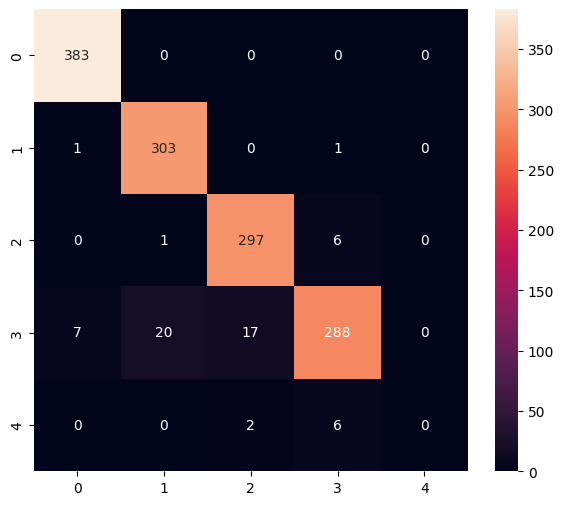

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       383
           1       0.94      0.99      0.96       305
           2       0.94      0.98      0.96       304
           3       0.96      0.87      0.91       332
           4       0.00      0.00      0.00         8

    accuracy                           0.95      1332
   macro avg       0.76      0.77      0.76      1332
weighted avg       0.95      0.95      0.95      1332



D:\anaconda\envs\cv311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\cv311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\cv311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

D:\anaconda\envs\cv311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jiyan\AppData\Local\Temp\tmp_kdwaef3\assets


INFO:tensorflow:Assets written to: C:\Users\jiyan\AppData\Local\Temp\tmp_kdwaef3\assets


6476

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.6271614e-14 9.4700998e-01 6.7782900e-03 4.5490358e-02 7.2137703e-04]
1
